## Importing Libs

In [9]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
# importing Libs
import os
import sys
import re
import numpy as np
import pandas as pd
import pickle as pkl
import lxml.etree as etb
import lxml.html as ht
import matplotlib.pyplot as plt
from pathlib import Path
import requests
from bs4 import BeautifulSoup
import plotly.express as px
import bt
import yahoo_fin.stock_info as si
import mplfinance as mfin
from
Path.ls = lambda x: list(x.iterdir())

In [11]:
sys.path.append(str(Path(os.getcwd()).parent/'data'))

In [12]:
from nseindia import *
from icharts import *
from namemapping import *

In [46]:
pip install googlefinance.client

     |████████████████████████████████| 60 kB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 251 kB 2.6 MB/s eta 0:00:01
  Created wheel for googlefinance.client: filename=googlefinance.client-1.3.0-py3-none-any.whl size=4588 sha256=e45920b91610d2a089f23c10d355c4032043edba9c9f7dbaaa652d530231a6fe
  Stored in directory: /home/rishubh/.cache/pip/wheels/0b/c6/db/2b0d4402abdd186ac44139105b810c3cc91ac7079683f40261
Successfully built googlefinance.client
Note: you may need to restart the kernel to use updated packages.


## Banknifty Data

### yahoo finance data

In [27]:
bnifty_data = si.get_data(namemap['banknifty'])
nifty_data = si.get_data(namemap['nifty'])

In [16]:
#mfin.plot(nifty_data.loc['2018':,:], type='candle', mav=(21,50), style='charles')

In [17]:
#mfin.plot(bnifty_data.loc['2018':,:], type='candle', mav=(21,50), style='charles')


In [8]:
bnifty_data.head()

,open,high,low,close,adjclose,volume,ticker
2007-09-17,6898.000000,6977.200195,6843.000000,6897.100098,6897.100098,0.0,^NSEBANK
2007-09-18,6921.149902,7078.950195,6883.600098,7059.649902,7059.649902,0.0,^NSEBANK
2007-09-19,7111.000000,7419.350098,7111.000000,7401.850098,7401.850098,0.0,^NSEBANK
2007-09-20,7404.950195,7462.899902,7343.600098,7390.149902,7390.149902,0.0,^NSEBANK
2007-09-21,7378.299805,7506.350098,7367.149902,7464.500000,7464.500000,0.0,^NSEBANK


## Statistics

In [30]:
bnifty_data.loc['2015':,'range'] = bnifty_data['high'] - bnifty_data['low']

<IPython.core.display.Javascript object>


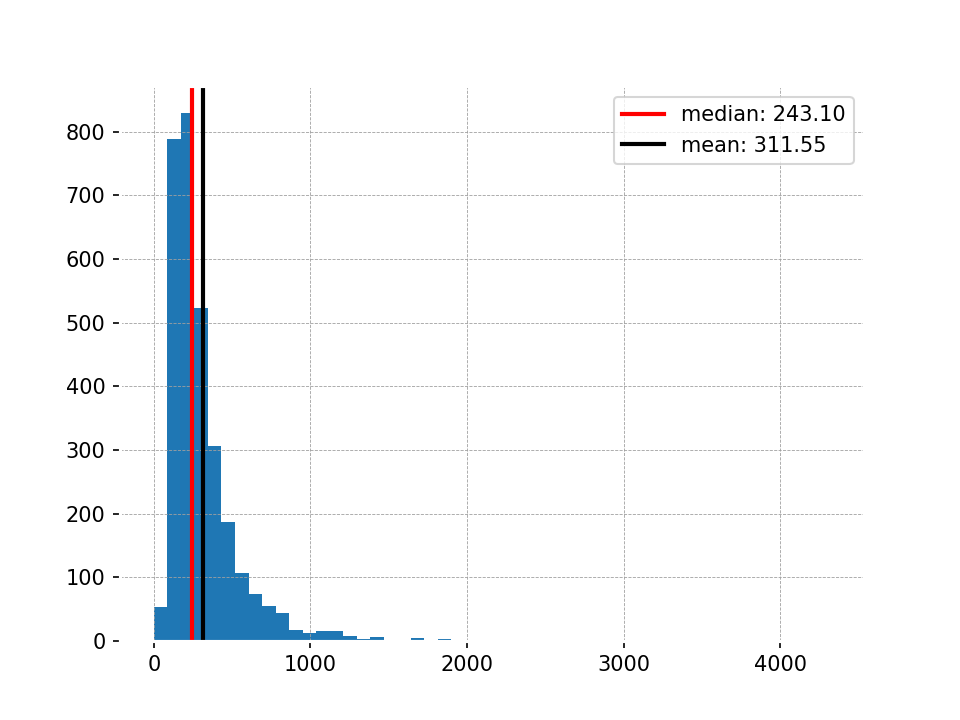

In [43]:
bnifty_data['range'].hist(bins=50)
plt.axvline(bnifty_data['range'].median(), c='r', label=f"median: {bnifty_data['range'].median():.2f}")
plt.axvline(bnifty_data['range'].mean(), c='k', label=f"mean: {bnifty_data['range'].mean():.2f}")
plt.legend(loc='best')
plt.show()

<IPython.core.display.Javascript object>


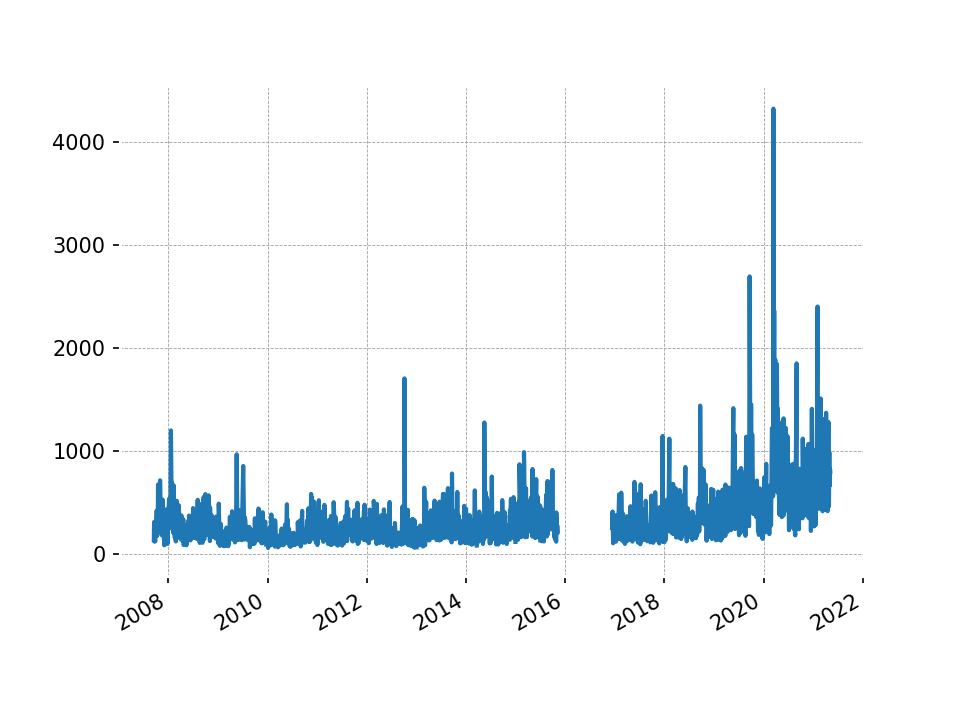

/home/rishubh/miniconda3/envs/fin/lib/python3.6/site-packages/pandas/plotting/_compat.py:57: MatplotlibDeprecationWarning:


The compare_versions function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.



In [44]:
bnifty_data['range'].plot()
plt.show()

## Gap finder

In [23]:
# Finding Gaps in Banknifty
bnifty_data.loc['shifted_open'] = bnifty_data['open'].shift(-1)